In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
print(tf.__version__)

2.12.0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# root_dir = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kukuhprakoso","key":"b34dcfa530f780e3be0d5afff2320747"}'}

In [ ]:
!pip install kaggle -q      # At first, I suspect the kaggle API lose effect so it doesn't have .kaggle folder. (not working)
!rm -rf /root/.kaggle.      # when I created the folder, it says the file or dir already exits
!mkdir /root/.kaggle        # successful
!mv kaggle.json /root/.kaggle/kaggle.json    # not sure if I have to use full destination path, I previously only used /root/.kaggle and it failed. Don't have time to validate this thought.
!ls /root/.kaggle/kaggle.json
!kaggle datasets download kukuhprakoso/face-dataset-bangkit-2023-scancare

/root/.kaggle/kaggle.json
 94% 129M/137M [00:02<00:00, 87.1MB/s]
100% 137M/137M [00:02<00:00, 61.3MB/s]


In [ ]:

# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/content/face-dataset-bangkit-2023-scancare.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
os.mkdir('/content/dataset')
zip_ref.extractall('/content/dataset')
zip_ref.close()


In [ ]:
base_dir = '/content/dataset/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_kistik = os.path.join(train_dir, 'cystic')
# train_komedo_hitam = os.path.join(train_dir, 'komedo_hitam')
# train_komedo_putih = os.path.join(train_dir, 'komedo_putih')
train_bopeng = os.path.join(train_dir, 'bopeng')
# train_nodul = os.path.join(train_dir, 'nodul')
train_papula = os.path.join(train_dir, 'papula')
train_pustula = os.path.join(train_dir, 'pustula')
train_pasir = os.path.join(train_dir, 'bruntusan')
# train_kulit_sehat = os.path.join(train_dir, 'kulit_sehat')

In [ ]:
validation_kistik = os.path.join(validation_dir, 'cystic')
# validation_komedo_hitam = os.path.join(validation_dir, 'komedo_hitam')
# validation_komedo_putih = os.path.join(validation_dir, 'komedo_putih')
validation_bopeng = os.path.join(validation_dir, 'bopeng')
# validation_nodul = os.path.join(validation_dir, 'nodul')
validation_papula = os.path.join(validation_dir, 'papula')
validation_pustula = os.path.join(validation_dir, 'pustula')
validation_pasir = os.path.join(validation_dir, 'bruntusan')
# validation_kulit_sehat = os.path.join(validation_dir, 'kulit_sehat')

In [ ]:
os.mkdir(train_kistik)
# os.mkdir(train_komedo_hitam)
# os.mkdir(train_komedo_putih)
os.mkdir(train_bopeng)
# os.mkdir(train_nodul)
os.mkdir(train_papula)
os.mkdir(train_pustula)
os.mkdir(train_pasir)
# os.mkdir(train_kulit_sehat)

In [ ]:
os.mkdir(validation_kistik)
# os.mkdir(validation_komedo_hitam)
# os.mkdir(validation_komedo_putih)
os.mkdir(validation_bopeng)
# os.mkdir(validation_nodul)
os.mkdir(validation_papula)
os.mkdir(validation_pustula)
os.mkdir(validation_pasir)
# os.mkdir(validation_kulit_sehat)

In [ ]:
os.listdir('/content/dataset/train')

['papula', 'pustula', 'cystic', 'bruntusan', 'bopeng']

In [ ]:
os.listdir('/content/dataset/val')

['papula', 'pustula', 'cystic', 'bruntusan', 'bopeng']

In [ ]:
# komedo_hitam_dir = os.path.join(base_dir, 'komedo_hitam')
pasir_dir = os.path.join(base_dir, 'bruntusan')
bopeng_dir = os.path.join(base_dir, 'bopeng')
# kulit_sehat_dir = os.path.join(base_dir, 'kulit_sehat')
papula_dir = os.path.join(base_dir, 'papula')
pustula_dir = os.path.join(base_dir, 'pustula')
# komedo_putih_dir = os.path.join(base_dir, 'komedo_putih')
kistik_dir = os.path.join(base_dir, 'cystic')
# nodul_dir = os.path.join(base_dir, 'nodul')

In [ ]:
# train_komedo_hitam_dir, val_komedo_hitam_dir = train_test_split(os.listdir(komedo_hitam_dir), test_size = 0.40)
train_pasir_dir, val_pasir_dir = train_test_split(os.listdir(pasir_dir), test_size = 0.40)
train_bopeng_dir, val_bopeng_dir = train_test_split(os.listdir(bopeng_dir), test_size = 0.40)
# train_kulit_sehat_dir, val_kulit_sehat_dir = train_test_split(os.listdir(kulit_sehat_dir), test_size = 0.40)
train_papula_dir, val_papula_dir = train_test_split(os.listdir(papula_dir), test_size = 0.40)
train_pustula_dir, val_pustula_dir = train_test_split(os.listdir(pustula_dir), test_size = 0.40)
# train_komedo_putih_dir, val_komedo_putih_dir = train_test_split(os.listdir(komedo_putih_dir), test_size = 0.40)
train_kistik_dir, val_kistik_dir = train_test_split(os.listdir(kistik_dir), test_size = 0.40)
# train_nodul_dir, val_nodul_dir = train_test_split(os.listdir(nodul_dir), test_size = 0.40)

In [ ]:
# for file in train_komedo_hitam_dir:
#   shutil.copy(os.path.join(komedo_hitam_dir, file), os.path.join(train_komedo_hitam, file))
for file in train_pasir_dir:
  shutil.copy(os.path.join(pasir_dir,file), os.path.join(train_pasir,file))
for file in train_bopeng_dir:
  shutil.copy(os.path.join(bopeng_dir,file), os.path.join(train_bopeng,file))
# for file in train_kulit_sehat_dir:
#   shutil.copy(os.path.join(kulit_sehat_dir, file), os.path.join(train_kulit_sehat, file))
for file in train_papula_dir:
  shutil.copy(os.path.join(papula_dir,file), os.path.join(train_papula,file))
for file in train_pustula_dir:
  shutil.copy(os.path.join(pustula_dir,file), os.path.join(train_pustula,file))
# for file in train_komedo_putih_dir:
#   shutil.copy(os.path.join(komedo_putih_dir, file), os.path.join(train_komedo_putih, file))
for file in train_kistik_dir:
  shutil.copy(os.path.join(kistik_dir,file), os.path.join(train_kistik,file))
# for file in train_nodul_dir:
#   shutil.copy(os.path.join(nodul_dir,file), os.path.join(train_nodul,file))

In [ ]:
# for file in val_komedo_hitam_dir:
#   shutil.copy(os.path.join(komedo_hitam_dir, file), os.path.join(validation_komedo_hitam, file))
for file in val_pasir_dir:
  shutil.copy(os.path.join(pasir_dir,file), os.path.join(validation_pasir,file))
for file in val_bopeng_dir:
  shutil.copy(os.path.join(bopeng_dir,file), os.path.join(validation_bopeng,file))
# for file in val_kulit_sehat_dir:
#   shutil.copy(os.path.join(kulit_sehat_dir, file), os.path.join(validation_kulit_sehat, file))
for file in val_papula_dir:
  shutil.copy(os.path.join(papula_dir,file), os.path.join(validation_papula,file))
for file in val_pustula_dir:
  shutil.copy(os.path.join(pustula_dir,file), os.path.join(validation_pustula,file))
# for file in val_komedo_putih_dir:
#   shutil.copy(os.path.join(komedo_putih_dir, file), os.path.join(validation_komedo_putih, file))
for file in val_kistik_dir:
  shutil.copy(os.path.join(kistik_dir,file), os.path.join(validation_kistik,file))
# for file in val_nodul_dir:
#   shutil.copy(os.path.join(nodul_dir,file), os.path.join(validation_nodul,file))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale = 1./225,
                    rotation_range = 20,
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale = 1./225,
                    rotation_range = 20,
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='categorical'
        )
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='categorical')

print(validation_generator.class_indices)

Found 614 images belonging to 5 classes.
Found 411 images belonging to 5 classes.
{'bopeng': 0, 'bruntusan': 1, 'cystic': 2, 'papula': 3, 'pustula': 4}


In [ ]:
# from tensorflow.keras.applications import MobileNetV2
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# for layer in base_model.layers:
#     layer.trainable = False

In [ ]:
# from tensorflow.keras.models import Sequential
# model = Sequential()
# model.add(base_model)


In [ ]:
# base_model.summary()

In [ ]:

# # Flatten the output from VGG19
# from tensorflow.keras import regularizers
# from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Conv2D, Flatten, Dense

# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))

# # Add the output layer
# model.add(Dense(8, activation='softmax'))
#kernel_regularizer=regularizers.L2(l2=0.05)
     

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
class stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("Akurasi sudah cukup")
      self.model.stop_training = True

stops = stop()

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 17,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [stop()]
)

Epoch 1/100
17/17 - 53s - loss: 1.6253 - accuracy: 0.1931 - val_loss: 1.6096 - val_accuracy: 0.2188 - 53s/epoch - 3s/step
Epoch 2/100
17/17 - 44s - loss: 1.6103 - accuracy: 0.1969 - val_loss: 1.6094 - val_accuracy: 0.1562 - 44s/epoch - 3s/step
Epoch 3/100
17/17 - 44s - loss: 1.6092 - accuracy: 0.2027 - val_loss: 1.6097 - val_accuracy: 0.2062 - 44s/epoch - 3s/step
Epoch 4/100
17/17 - 45s - loss: 1.6095 - accuracy: 0.2124 - val_loss: 1.6080 - val_accuracy: 0.2750 - 45s/epoch - 3s/step
Epoch 5/100
17/17 - 45s - loss: 1.6051 - accuracy: 0.2741 - val_loss: 1.6198 - val_accuracy: 0.2062 - 45s/epoch - 3s/step
Epoch 6/100
17/17 - 44s - loss: 1.6197 - accuracy: 0.2085 - val_loss: 1.6060 - val_accuracy: 0.2750 - 44s/epoch - 3s/step
Epoch 7/100
17/17 - 45s - loss: 1.5853 - accuracy: 0.2471 - val_loss: 1.5887 - val_accuracy: 0.2562 - 45s/epoch - 3s/step
Epoch 8/100
17/17 - 46s - loss: 1.5480 - accuracy: 0.2739 - val_loss: 1.4986 - val_accuracy: 0.3313 - 46s/epoch - 3s/step
Epoch 9/100
17/17 - 44s 

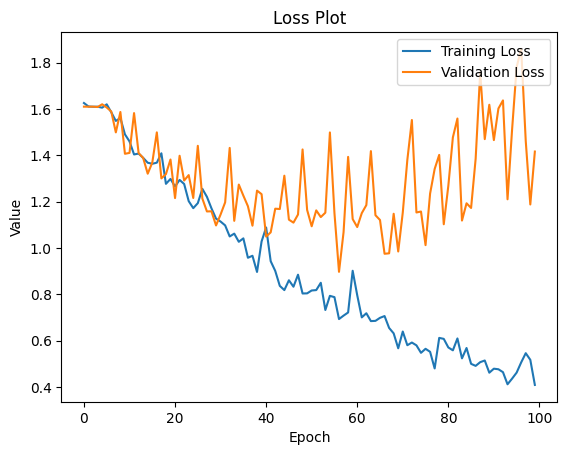

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

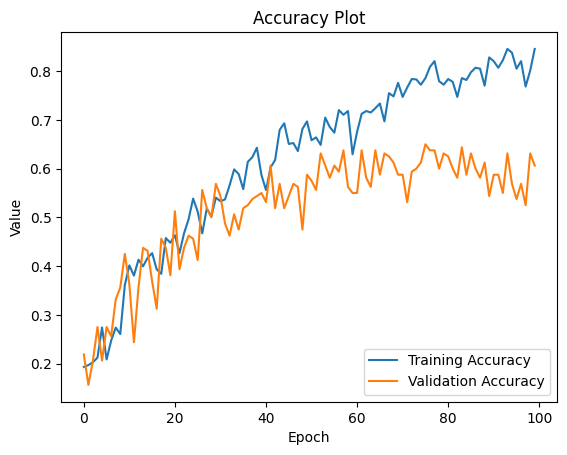

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving papula.width-800.format-webp.jpg to papula.width-800.format-webp.jpg
1/1 [==============================] - 0s 37ms/step
papula.width-800.format-webp.jpg
[[1. 0. 0. 0. 0.]]
bopeng: 100.00%
bruntusan: 0.00%
cystic: 0.00%
papula: 0.00%
pustula: 0.00%
Predicted class: bopeng


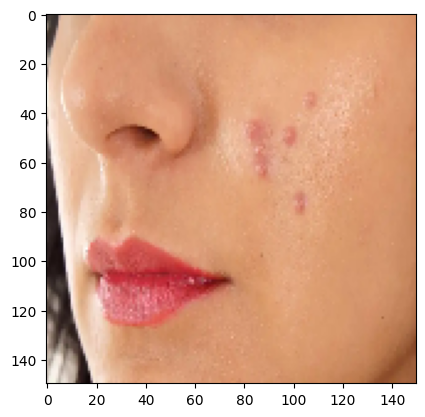

In [ ]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = tf.keras.utils.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  print(classes)
  # if classes[0,0]!=0:
  #   print('paper')
  # elif classes[0,1]!=0:
  #   print('rock')
  # else:
  #   print('scissors')
  # Menentukan kelas dengan probabilitas tertinggi
  class_names = ['bopeng', 'bruntusan', 'cystic', 'papula', 'pustula']

  highest_prob_index = np.argmax(classes[0])
  predicted_class = class_names[highest_prob_index]

  # Menghitung persentase untuk setiap kelas
  percentages = classes[0] * 100

  # Menampilkan hasil dengan persentase
  for i in range(len(class_names)):
      print(f'{class_names[i]}: {percentages[i]:.2f}%')

  print('Predicted class:', predicted_class)


In [ ]:
from tensorflow.keras.models import load_model

# Assuming you have a trained Keras model called 'model'
model.save('model.h5')